In [361]:
import pandas as pd
import numpy as np
import datetime as datetime

In [306]:
df = pd.read_csv("data/archive/data.csv")
df.head()

,Rank,Name,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,VGChartz_Score,Critic_Score,...,NA_Sales,PAL_Sales,JP_Sales,Other_Sales,Year,Last_Update,url,status,Vgchartzscore,img_url
0,1,Wii Sports,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,7.7,...,NaN,NaN,NaN,NaN,2006.0,NaN,http://www.vgchartz.com/game/2667/wii-sports/?...,1,NaN,/games/boxart/full_2258645AmericaFrontccc.jpg
1,2,Super Mario Bros.,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,NaN,10.0,...,NaN,NaN,NaN,NaN,1985.0,NaN,http://www.vgchartz.com/game/6455/super-mario-...,1,NaN,/games/boxart/8972270ccc.jpg
2,3,Mario Kart Wii,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,NaN,8.2,...,NaN,NaN,NaN,NaN,2008.0,11th Apr 18,http://www.vgchartz.com/game/6968/mario-kart-w...,1,8.7,/games/boxart/full_8932480AmericaFrontccc.jpg
3,4,PlayerUnknown's Battlegrounds,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,NaN,NaN,...,NaN,NaN,NaN,NaN,2017.0,13th Nov 18,http://www.vgchartz.com/game/215988/playerunkn...,1,NaN,/games/boxart/full_8052843AmericaFrontccc.jpg
4,5,Wii Sports Resort,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,NaN,8.0,...,NaN,NaN,NaN,NaN,2009.0,NaN,http://www.vgchartz.com/game/24656/wii-sports-...,1,8.8,/games/boxart/full_7295041AmericaFrontccc.jpg


# Data Cleaning

<b> Select relevant columns

In [307]:
df.columns

Index(['Rank', 'Name', 'basename', 'Genre', 'ESRB_Rating', 'Platform',
       'Publisher', 'Developer', 'VGChartz_Score', 'Critic_Score',
       'User_Score', 'Total_Shipped', 'Global_Sales', 'NA_Sales', 'PAL_Sales',
       'JP_Sales', 'Other_Sales', 'Year', 'Last_Update', 'url', 'status',
       'Vgchartzscore', 'img_url'],
      dtype='object')

In [308]:
games = df[['basename','Genre','ESRB_Rating','Platform','Publisher','Developer','Year','Global_Sales']]

In [309]:
games.head()

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
0,wii-sports,Sports,E,Wii,Nintendo,Nintendo EAD,2006.0,NaN
1,super-mario-bros,Platform,NaN,NES,Nintendo,Nintendo EAD,1985.0,NaN
2,mario-kart-wii,Racing,E,Wii,Nintendo,Nintendo EAD,2008.0,NaN
3,playerunknowns-battlegrounds,Shooter,NaN,PC,PUBG Corporation,PUBG Corporation,2017.0,NaN
4,wii-sports-resort,Sports,E,Wii,Nintendo,Nintendo EAD,2009.0,NaN


<b> Drop entries without sales result

In [310]:
games = games[games['Global_Sales'].notna()]
games.head()

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013.0,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014.0,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002.0,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013.0,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015.0,15.09


In [311]:
games

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013.0,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014.0,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002.0,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013.0,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015.0,15.09
...,...,...,...,...,...,...,...,...
21237,"body & soul blend it""",Puzzle,NaN,DS,505 Games,Crush Digital,2010.0,0.00
21238,ride-carnival-tycoon,Strategy,E,PC,ValuSoft,ValuSoft,2007.0,0.00
21239,shinobido-tales-of-the-ninja,Action,NaN,PSP,Sony Computer Entertainment,Acquire,2007.0,0.00
21240,tactical-ops-assault-on-terror,Shooter,NaN,PC,Atari,Kamehan Studios,2002.0,0.00


<b> Check genre column

In [312]:
# Genre column looks okay
print(games['Genre'].unique())
print(games['Genre'].isna().sum())

['Action' 'Shooter' 'Action-Adventure' 'Sports' 'Misc' 'Role-Playing'
 'Simulation' 'Platform' 'Racing' 'Music' 'Fighting' 'Adventure'
 'Strategy' 'Puzzle' 'MMO' 'Sandbox' 'Party' 'Board Game' 'Visual Novel'
 'Education']
0


Make a quick bar chart to examine the distribution

<AxesSubplot:>

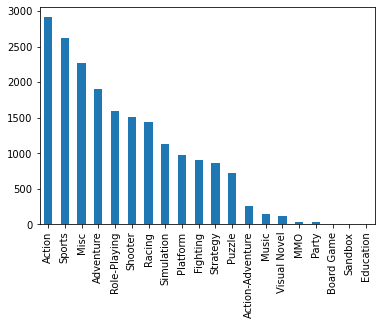

In [313]:
games['Genre'].value_counts().plot.bar()

<b> Now let's check out the ESRB_Rating column

In [314]:
games['ESRB_Rating'].unique()

array(['M', 'E', 'E10', 'T', nan, 'RP', 'EC'], dtype=object)

In [315]:
games['ESRB_Rating'].value_counts()

E      5883
T      3953
M      2059
E10    1844
RP       44
EC       27
Name: ESRB_Rating, dtype: int64

About 29% of our entries dont have an ESRB rating.  There is a rating called RP which means rating pending which we could use, or we could create an entirely separate value for our unknown ratings.  I think I shall group them as 'Unknown'

In [316]:
games['ESRB_Rating'].isna().mean()

0.28869430852433686

In [317]:
games["ESRB_Rating"] = games['ESRB_Rating'].fillna('Unknown')

In [318]:
games.head()

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013.0,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014.0,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002.0,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013.0,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015.0,15.09


<b> Let's check the platform column

In [319]:
print(games["Platform"].unique())

['PS3' 'PS4' 'PS2' 'X360' 'Wii' 'XOne' 'PC' 'PSP' 'PS' 'DS' 'NS' '2600'
 'GBA' 'NES' 'XB' '3DS' 'PSN' 'GEN' 'PSV' 'DC' 'N64' 'GB' 'SNES' 'SAT'
 'GBC' 'GC' 'SCD' 'WiiU' 'WS' 'VC' 'NG' 'WW' 'PCE' 'XBL' '3DO' 'GG' 'OSX'
 'PCFX' 'Mob']


In [320]:
games['Platform'].isna().mean()

0.0

<AxesSubplot:>

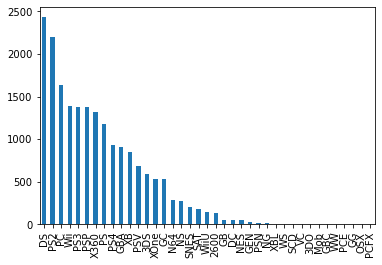

In [321]:
games['Platform'].value_counts().plot.bar()

In [322]:
games[games['Platform'] == '3DO']

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
12820,super-street-fighter-ii-turbo,Fighting,Unknown,3DO,Panasonic Interactive Media,Capcom,1994.0,0.09
14609,policenauts,Adventure,Unknown,3DO,Konami,Konami,1995.0,0.06
17342,bust-a-move,Puzzle,E,3DO,Panasonic Interactive Media,Taito Corporation,1995.0,0.02
17918,sotsugyou-ii-neo-generation-special,Simulation,Unknown,3DO,Imageworks,Shar Rock,1995.0,0.02


There are quite a few platforms with only a few entries, we could group them into a platform called 'other' but I think it will be okay to leave it as is

<b> Now let's check out the Publisher Columns

In [323]:
games['Publisher'].nunique()

744

In [324]:
games['Publisher'].isna().mean()

0.0

In [325]:
games['Publisher'].value_counts()

Activision                1051
Ubisoft                   1021
Electronic Arts            859
Konami                     789
THQ                        739
                          ... 
King Records                 1
General Entertainment        1
Game Arts                    1
Syscom                       1
iEntertainment Network       1
Name: Publisher, Length: 744, dtype: int64

Publisher column also looks okay

<b> Check Developer Column

In [326]:
games['Developer'].isna().mean()

0.00020602626834921454

There are a small number of entries where developer is null

In [327]:
games[games['Developer'].isna()]

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
10839,gourmet-chef-cook-your-way-to-fame,Misc,E,DS,Ubisoft,NaN,2008.0,0.14
12704,wordmaster,Strategy,E,DS,"Destination Software, Inc",NaN,2008.0,0.09
20694,sas-secure-tomorrow,Shooter,Unknown,PC,City Interactive,NaN,2008.0,0.00
21227,my-baby-and-me,Misc,E,Wii,Unknown,NaN,NaN,0.00


I checked these games online for their developers, and it seems that the developer is the same as the publisher, so I will naturally set them equal

In [328]:
def fill_developer(row):
    if row['Developer'] is np.nan:
        row['Developer'] = row['Publisher']
    return row

In [329]:
games = games.apply(fill_developer,axis=1)
games['Developer'].isna().mean()

0.0

<b> Check Year Column

In [330]:
games['Year'].unique()

array([2013., 2014., 2002., 2015., 2011., 2010., 2018., 2012., 2009.,
       2017., 2001., 2008., 2016., 2007., 2005., 1997., 2003., 1998.,
       2004., 1999., 1996., 2006., 2000., 1982., 1981., 1989., 1994.,
       1995., 1993., 1990., 1978., 1988., 1983., 1986., 1992., 1977.,
       1987., 1991., 1985., 2019., 2020., 1984., 1980., 1970., 1979.,
         nan])

In [331]:
games['Year'].isna().mean()

0.001957249549317538

In [332]:
games[games['Year'].isna()]

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
15224,tour-de-france-2011,Sports,E,X360,Unknown,Cyanide Studio,NaN,0.05
15653,the-history-channel-great-battles-medieval,Strategy,Unknown,PS3,Unknown,Slitherine Software,NaN,0.04
15791,blue-legend-of-water,Adventure,Unknown,PS,Unknown,Unknown,NaN,0.04
20065,wii-de-asobu-metroid-prime-2-dark-echoes,Shooter,Unknown,Wii,Unknown,Retro Studios,NaN,0.00
20086,iron-master-the-legendary-blacksmith,Action,RP,DS,Unknown,Barunson Creative,NaN,0.00
20142,alone-in-the-dark-infernojp-sales,Action,Unknown,PS3,Unknown,Unknown,NaN,0.00
20167,hello-kitty-picnic-with-sanrio-friends,Misc,Unknown,3DS,Unknown,Unknown,NaN,0.00
20184,blood-bowl,Sports,RP,DS,Unknown,Cyanide Studio,NaN,0.00
20186,dokapon-kingdom-jp-sales,Action,Unknown,Wii,Unknown,Unknown,NaN,0.00
20367,iq-trainer,Misc,E,DS,Unknown,DreamCatcher Interactive,NaN,0.00


Im going to set the year equal to the average of the year for games in the same platform

In [333]:
def fill_year(row):
    #check for nan
    if row['Year'] != row['Year']:
        row['Year'] = platform_year_dict[row['Platform']]
    return row

In [334]:
platform_year_dict = games.groupby('Platform')['Year'].mean()
games = games.apply(fill_year, axis=1)

In [335]:
games['Year'].isna().mean()

0.0

Let's plot to check distribution

<AxesSubplot:xlabel='Platform'>

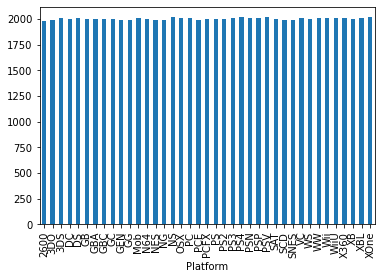

In [336]:
platform_years.plot.bar()

<AxesSubplot:title={'center':'Age by platform'}, xlabel='Platform'>

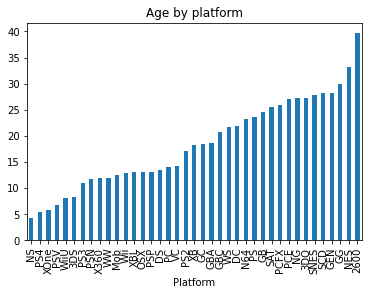

In [337]:
(datetime.now().year - platform_years).sort_values().plot.bar(title='Age by platform')

Let's also convert year to int

In [349]:
games = games.astype({'Year':int})

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales (million)
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015,15.09
...,...,...,...,...,...,...,...,...
21237,"body & soul blend it""",Puzzle,Unknown,DS,505 Games,Crush Digital,2010,0.00
21238,ride-carnival-tycoon,Strategy,E,PC,ValuSoft,ValuSoft,2007,0.00
21239,shinobido-tales-of-the-ninja,Action,Unknown,PSP,Sony Computer Entertainment,Acquire,2007,0.00
21240,tactical-ops-assault-on-terror,Shooter,Unknown,PC,Atari,Kamehan Studios,2002,0.00


<b> Add units to global_sales column for clarity

In [352]:
games.rename({'Global_Sales':'Global_Sales (million)'},axis=1)

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales (million)
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015,15.09
...,...,...,...,...,...,...,...,...
21237,"body & soul blend it""",Puzzle,Unknown,DS,505 Games,Crush Digital,2010,0.00
21238,ride-carnival-tycoon,Strategy,E,PC,ValuSoft,ValuSoft,2007,0.00
21239,shinobido-tales-of-the-ninja,Action,Unknown,PSP,Sony Computer Entertainment,Acquire,2007,0.00
21240,tactical-ops-assault-on-terror,Shooter,Unknown,PC,Atari,Kamehan Studios,2002,0.00


In [355]:
games.isna().mean()

basename        0.0
Genre           0.0
ESRB_Rating     0.0
Platform        0.0
Publisher       0.0
Developer       0.0
Year            0.0
Global_Sales    0.0
dtype: float64

In [370]:
def clean_data(df):
    """use this to clean training/test data"""
    
    def fill_developer(row):
        """fills nan developers with the publisher"""
        if row['Developer'] is np.nan:
            row['Developer'] = row['Publisher']
        return row
    
    def fill_year(row):
        """fills nan years with average year of games on the same platform"""
        if row['Year'] != row['Year']:
            row['Year'] = platform_year_dict[row['Platform']]
        return row
    
    
    games = df[['basename','Genre','ESRB_Rating','Platform','Publisher','Developer','Year','Global_Sales']]
    games = games[games['Global_Sales'].notna()]
    games["ESRB_Rating"] = games['ESRB_Rating'].fillna('Unknown')
    games = games.apply(fill_developer,axis=1)
    platform_year_dict = games.groupby('Platform')['Year'].mean()
    games = games.apply(fill_year, axis=1)
    games = games.astype({'Year':int})
    games.rename({'Global_Sales':'Global_Sales (million)'},axis=1)
    
    return games

# EDA

In [371]:
df = pd.read_csv("data/archive/data.csv")
games = clean_data(df)

In [372]:
games

,basename,Genre,ESRB_Rating,Platform,Publisher,Developer,Year,Global_Sales
19,grand-theft-auto-v,Action,M,PS3,Rockstar Games,Rockstar North,2013,20.32
20,grand-theft-auto-v,Action,M,PS4,Rockstar Games,Rockstar North,2014,19.39
30,grand-theft-auto-vice-city,Action,M,PS2,Rockstar Games,Rockstar North,2002,16.15
32,grand-theft-auto-v,Action,M,X360,Rockstar Games,Rockstar North,2013,15.86
34,call-of-duty-black-ops-3,Shooter,M,PS4,Activision,Treyarch,2015,15.09
...,...,...,...,...,...,...,...,...
21237,"body & soul blend it""",Puzzle,Unknown,DS,505 Games,Crush Digital,2010,0.00
21238,ride-carnival-tycoon,Strategy,E,PC,ValuSoft,ValuSoft,2007,0.00
21239,shinobido-tales-of-the-ninja,Action,Unknown,PSP,Sony Computer Entertainment,Acquire,2007,0.00
21240,tactical-ops-assault-on-terror,Shooter,Unknown,PC,Atari,Kamehan Studios,2002,0.00
